# Dependencies



In [1]:
%%capture
!pip install opendatasets

In [2]:
import numpy as np
import pandas as pd
import opendatasets as od
import os
from PIL import Image
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

import torch
from torch import nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader

seed=42

# Load Dataset

In [4]:
od.download(
    "https://www.kaggle.com/datasets/vasukipatel/face-recognition-dataset/")

df=pd.read_csv("./face-recognition-dataset/Dataset.csv")
df.head()

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: paolobiolghini
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/vasukipatel/face-recognition-dataset


100%|██████████| 726M/726M [00:03<00:00, 211MB/s]


,id,label
0,Robert Downey Jr_87.jpg,Robert Downey Jr
1,Lisa Kudrow_64.jpg,Lisa Kudrow
2,Ellen Degeneres_34.jpg,Ellen Degeneres
3,Billie Eilish_3.jpg,Billie Eilish
4,Hrithik Roshan_35.jpg,Hrithik Roshan


In [ ]:
print(df[df["id"] =="Robert Downey Jr_87.jpg"]["label"])
all_possible=df["label"].unique()

diz_lables={}
for pos,a in enumerate(all_possible):
    diz_lables[a]=pos
    pos+=1

print(diz_lables)

0    Robert Downey Jr
Name: label, dtype: object
{'Robert Downey Jr': 0, 'Lisa Kudrow': 1, 'Ellen Degeneres': 2, 'Billie Eilish': 3, 'Hrithik Roshan': 4, 'Vijay Deverakonda': 5, 'Tom Cruise': 6, 'Alia Bhatt': 7, 'Elizabeth Olsen': 8, 'Charlize Theron': 9, 'Natalie Portman': 10, 'Priyanka Chopra': 11, 'Zac Efron': 12, 'Marmik': 13, 'Camila Cabello': 14, 'Claire Holt': 15, 'Brad Pitt': 16, 'Anushka Sharma': 17, 'Roger Federer': 18, 'Akshay Kumar': 19, 'Alexandra Daddario': 20, 'Hugh Jackman': 21, 'Andy Samberg': 22, 'Margot Robbie': 23, 'Courtney Cox': 24, 'Dwayne Johnson': 25, 'Amitabh Bachchan': 26, 'Henry Cavill': 27, 'Virat Kohli': 28, 'Jessica Alba': 29, 'Kashyap': 30}


In [ ]:
root_dir = "./face-recognition-dataset/Faces/Faces/"

checkwidth, checkheight= None,None

X=[]
y=[]
y_string=[]


for dirpath, _, filenames in os.walk(root_dir):
    for filename in filenames:
        img_path = os.path.join(dirpath, filename)  

        img = Image.open(img_path)

        X.append(img)
        l=diz_lables[df[df["id"] ==filename]["label"].iloc[0]]
        y.append(l)

        s=df[df["id"] ==filename]["label"].iloc[0]
        y_string.append(s)

        width, height = img.size

        if( checkwidth==None or checkheight==None):
            checkwidth=width
            checkheight=height

        if width!= checkwidth or height!=checkheight:
            print(f"Mismatch {filename}")

        

X=np.array(X)
y=np.array(y)
X.shape,y.shape

((2562, 160, 160, 3), (2562,))

array([[[243, 240, 225],
        [242, 240, 227],
        [241, 241, 231],
        ...,
        [ 10,   8,  11],
        [ 12,  10,  15],
        [ 17,  15,  20]],

       [[246, 242, 231],
        [252, 249, 240],
        [248, 247, 242],
        ...,
        [  8,   6,   9],
        [  8,   6,  11],
        [ 12,  10,  15]],

       [[233, 229, 228],
        [230, 226, 225],
        [229, 227, 228],
        ...,
        [ 10,   5,   9],
        [  7,   5,   8],
        [ 10,   8,  11]],

       ...,

       [[  3,   3,   3],
        [  0,   0,   0],
        [  0,   1,   0],
        ...,
        [ 29,  23,  23],
        [ 21,  11,  12],
        [ 10,   0,   1]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   1,   0],
        ...,
        [ 13,   7,   9],
        [ 22,  11,  15],
        [ 38,  27,  31]],

       [[  0,   0,   0],
        [  2,   2,   2],
        [  2,   4,   3],
        ...,
        [ 22,  16,  20],
        [ 12,   1,   5],
        [ 21,  10,  14]]], dtype=uint8)
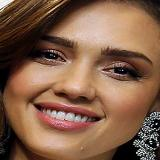

In [7]:
X[0]

# Explore Dataset

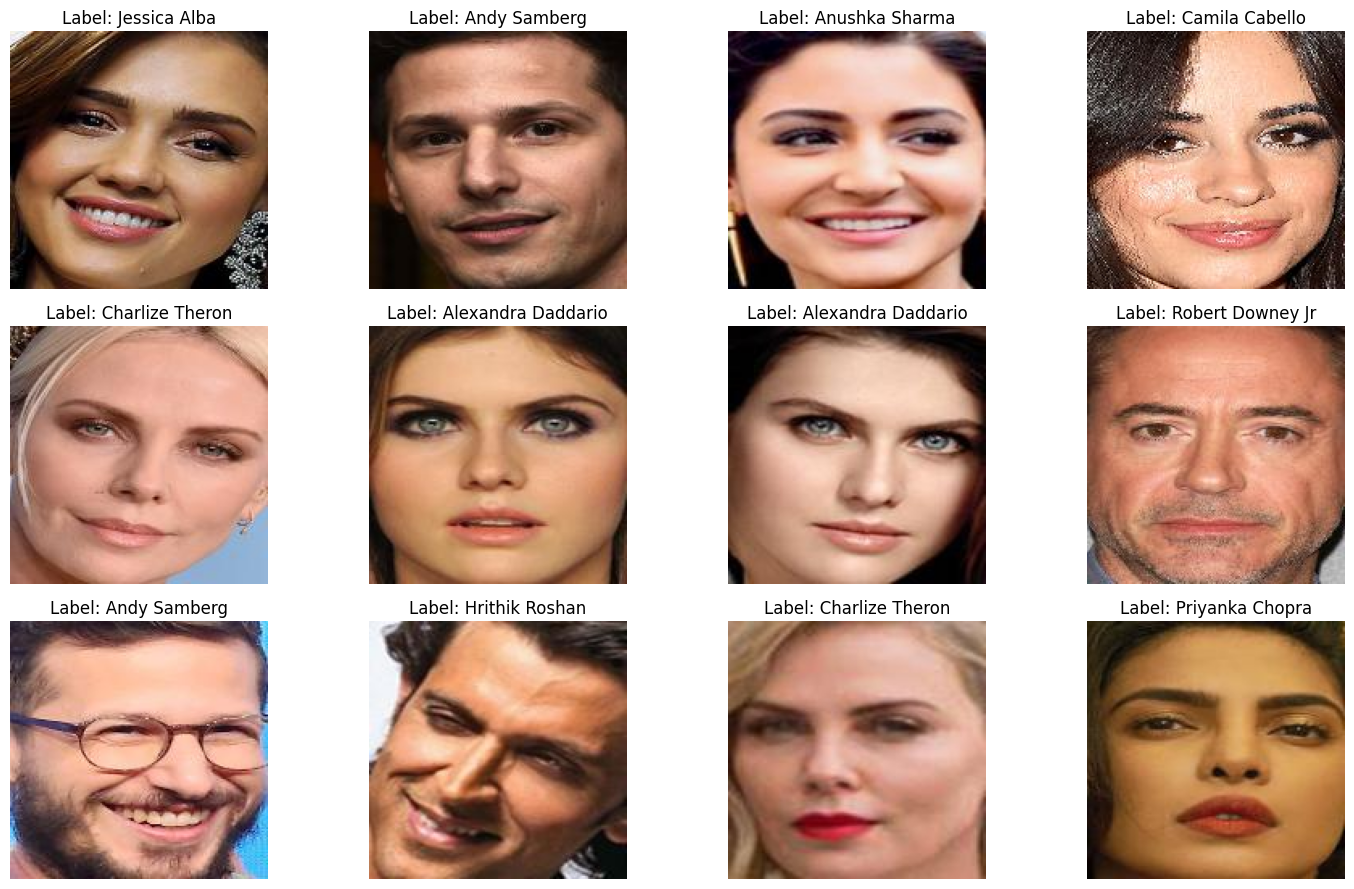

In [ ]:
num_images = 12  


num_cols = 4  
num_rows = (num_images + num_cols - 1) // num_cols
plt.figure(figsize=(15, 3 * num_rows))

for i in range(num_images):
    plt.subplot(num_rows, num_cols, i + 1)
    plt.imshow(X[i])
    plt.title(f"Label: {y_string[i]}")
    plt.axis('off')

plt.tight_layout()
plt.show()

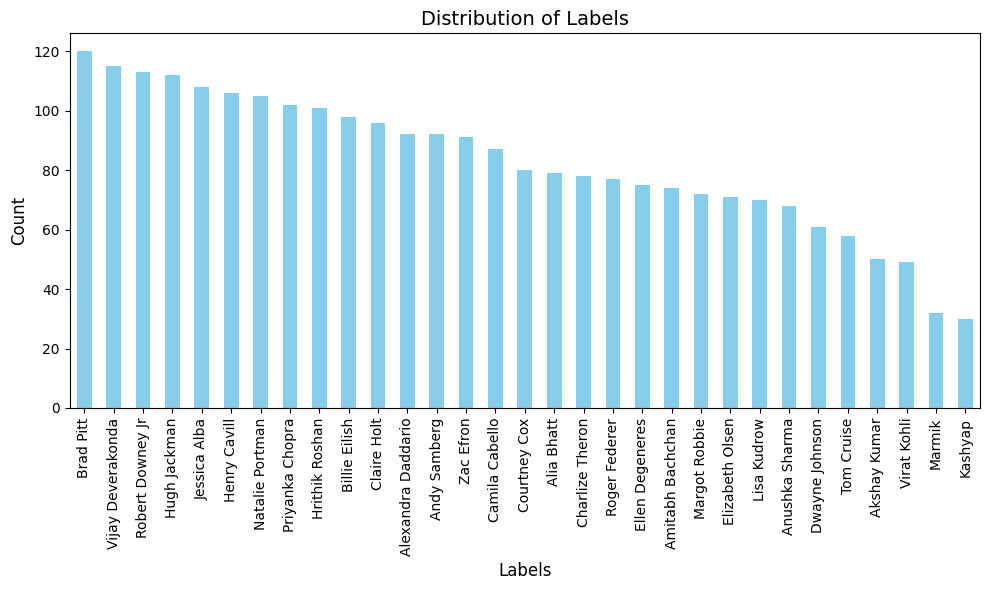

In [9]:
label_counts = df["label"].value_counts()

# Create a bar plot for the label distribution
plt.figure(figsize=(10, 6))
label_counts.plot(kind='bar', color='skyblue')

# Add titles and labels
plt.title("Distribution of Labels", fontsize=14)
plt.xlabel("Labels", fontsize=12)
plt.ylabel("Count", fontsize=12)

# Show the plot
plt.xticks(rotation=90)  # Rotate the x-axis labels for better readability
plt.tight_layout()
plt.show()

# Prepare Dataset

In [10]:
X_train_val,X_test,y_train_val,y_test=train_test_split(X,y,test_size=0.15,random_state=seed)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, random_state=seed, test_size=0.15, stratify=y_train_val)

X_train.shape,y_train.shape,X_test.shape,y_test.shape,X_val.shape,y_val.shape

((1850, 160, 160, 3),
 (1850,),
 (385, 160, 160, 3),
 (385,),
 (327, 160, 160, 3),
 (327,))

In [ ]:
import torch
from torch.utils.data import Dataset
from torchvision import transforms

class CustomDataset(Dataset):
    def __init__(self, images, labels, transform=None):
        self.images = images
        self.labels = labels
        self.transform = transform

        self.default_transform = transforms.Compose([
            transforms.ToTensor(),  # Converte HWC -> CHW e scala in [0,1]
        ])

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        image = self.images[idx]  # Formato originale: (H, W, C)
        label = self.labels[idx]

        if self.transform:
            image = self.transform(image)
        else:
            image = self.default_transform(image)

        return image, label

In [12]:
train_dataset = CustomDataset(X_train, y_train)
val_dataset = CustomDataset(X_val, y_val)
test_dataset = CustomDataset(X_test, y_test)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [13]:
def get_class_imbalance(y_one_hot):
    """
    Returns the class distribution given a one-hot encoded y array.

    Args:
        y_one_hot (numpy.ndarray): One-hot encoded label array of shape (n_samples, n_classes).

    Returns:
        dict: A dictionary with class indices as keys and sample counts as values.
    """
    unique_labels, counts = np.unique(y, return_counts=True)
    class_imbalance = {int(k): int(v) for k, v in zip(unique_labels, counts)}

    return class_imbalance

In [14]:
print(" BEFORE Imbalance: ",get_class_imbalance(y_train))

 BEFORE Imbalance:  {0: 113, 1: 70, 2: 75, 3: 98, 4: 101, 5: 115, 6: 58, 7: 79, 8: 71, 9: 78, 10: 105, 11: 102, 12: 91, 13: 32, 14: 87, 15: 96, 16: 120, 17: 68, 18: 77, 19: 50, 20: 92, 21: 112, 22: 92, 23: 72, 24: 80, 25: 61, 26: 74, 27: 106, 28: 49, 29: 108, 30: 30}


# Train


## Lib


In [ ]:
from sklearn.utils.class_weight import compute_class_weight
def calculate_class_weights(train_loader):
    all_labels = []
    for _, labels in train_loader:
        all_labels.extend(labels.numpy())

    classes = np.unique(all_labels)
    class_weights = compute_class_weight(
        class_weight="balanced",
        classes=classes,
        y=all_labels
    )
    return torch.tensor(class_weights, dtype=torch.float32)

In [16]:
class EarlyStopping:
    def __init__(self, patience=5, delta=0, verbose=False):
        """
        Args:
            patience (int): How many epochs to wait after last improvement
            delta (float): Minimum change to qualify as improvement
            verbose (bool): Print messages when improvement occurs
        """
        self.patience = patience
        self.delta = delta
        self.verbose = verbose
        self.counter = 0
        self.best_score = None
        self.early_stop = False
        self.val_loss_min = np.inf

    def __call__(self, val_loss, model):
        score = -val_loss  # We maximize negative loss (minimize loss)

        if self.best_score is None:
            self.best_score = score
            self.save_checkpoint(val_loss, model)
        elif score < self.best_score + self.delta:
            self.counter += 1
            if self.verbose:
                print(f'EarlyStopping counter: {self.counter}/{self.patience}')
            if self.counter >= self.patience:
                self.early_stop = True
        else:
            self.best_score = score
            self.save_checkpoint(val_loss, model)
            self.counter = 0

    def save_checkpoint(self, val_loss, model):
        """Save model when validation loss decreases"""
        if self.verbose:
            print(f'Val loss decreased ({self.val_loss_min:.6f} → {val_loss:.6f}). Saving model...')
        torch.save(model.state_dict(), 'checkpoint.pth')
        self.val_loss_min = val_loss

## Models

In [ ]:
class CustomModelTorch(nn.Module):
    def __init__(self,nclasses=31):
        super(CustomModelTorch, self).__init__()
        self.conv=nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(64, 64, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(64),
            nn.Dropout(0.3),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
        )
        self.fc=nn.Sequential(
            nn.AdaptiveAvgPool2d((4, 4)),
            nn.Flatten(),
            nn.Linear(64*4*4, 256),
            nn.ReLU(),
            nn.Dropout(0.4),
            nn.Linear(256, nclasses)
        )

        self._initialize_weights()

    def forward(self, x):
      x=self.conv(x)
      x=self.fc(x)
      return x

    def _initialize_weights(self):
        for m in self.modules():
            if isinstance(m, nn.Conv2d):
                nn.init.kaiming_normal_(m.weight, mode='fan_out', nonlinearity='relu')
                if m.bias is not None:
                    nn.init.constant_(m.bias, 0)
            elif isinstance(m, nn.BatchNorm2d):
                nn.init.constant_(m.weight, 1)
                nn.init.constant_(m.bias, 0)


In [ ]:
class EnhancedCNN(nn.Module):
    def __init__(self, nclasses=31, dropout_prob=0.5, use_attention=True):
        super(EnhancedCNN, self).__init__()


        self.features = nn.Sequential(
            nn.Conv2d(3, 64, 3, padding=1, bias=False),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),

            nn.Conv2d(64, 64, 3, groups=64, padding=1, bias=False),
            nn.Conv2d(64, 128, 1, bias=False),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),

            ResidualBlock(128, 256),
            nn.MaxPool2d(2, 2),

            ChannelAttention(256) if use_attention else nn.Identity()
        )

        self.classifier = nn.Sequential(
            nn.AdaptiveAvgPool2d((1, 1)),
            nn.Flatten(),
            nn.Linear(256, 512),
            nn.BatchNorm1d(512),
            nn.ReLU(),
            nn.Dropout(dropout_prob),
            nn.Linear(512, nclasses)
        )

        self._initialize_weights()

    def forward(self, x):
        x = self.features(x)
        x = self.classifier(x)
        return x  

    def _initialize_weights(self):
        for m in self.modules():
            if isinstance(m, nn.Conv2d):
                nn.init.kaiming_normal_(m.weight, mode='fan_out', nonlinearity='relu')
                if m.bias is not None:
                    nn.init.constant_(m.bias, 0)
            elif isinstance(m, nn.BatchNorm2d):
                nn.init.constant_(m.weight, 1)
                nn.init.constant_(m.bias, 0)

class ResidualBlock(nn.Module):
    def __init__(self, in_channels, out_channels):
        super().__init__()
        self.residual = nn.Sequential(
            nn.Conv2d(in_channels, out_channels, 3, padding=1, bias=False),
            nn.BatchNorm2d(out_channels),
            nn.ReLU(),
            nn.Conv2d(out_channels, out_channels, 3, padding=1, bias=False),
            nn.BatchNorm2d(out_channels)
        )
        self.shortcut = nn.Sequential(
            nn.Conv2d(in_channels, out_channels, 1, bias=False),
            nn.BatchNorm2d(out_channels)
        ) if in_channels != out_channels else nn.Identity()

    def forward(self, x):
        return F.gelu(self.residual(x) + self.shortcut(x))

class ChannelAttention(nn.Module):
    def __init__(self, channels, reduction=8):
        super().__init__()
        self.avg_pool = nn.AdaptiveAvgPool2d(1)
        self.max_pool = nn.AdaptiveMaxPool2d(1)
        self.fc = nn.Sequential(
            nn.Linear(channels, channels // reduction),
            nn.ReLU(),
            nn.Linear(channels // reduction, channels),
            nn.Sigmoid()
        )

    def forward(self, x):
        b, c, _, _ = x.size()
        avg = self.fc(self.avg_pool(x).view(b, c))
        max = self.fc(self.max_pool(x).view(b, c))
        return x * (avg + max).view(b, c, 1, 1)



In [ ]:
import torchvision.models as models

class PretrainedNetwork(nn.Module):
    def __init__(self,nclasses=31):
      super(PretrainedNetwork, self).__init__()
      self.backbone= models.resnet18(pretrained=True)

      in_features = self.backbone.fc.in_features  

      for param in self.backbone.parameters():
          param.requires_grad = False

      self.backbone.fc = nn.Sequential(
          nn.Linear(in_features, 256),
          nn.ReLU(inplace=True),
          nn.Dropout(0.4),
          nn.Linear(256, nclasses)
      )

      for param in self.backbone.fc.parameters():
          param.requires_grad = True



    def forward(self, x):
      x=self.backbone(x)
      return x

    def unfreeze(self):
      for param in self.backbone.parameters():
          param.requires_grad = True


## Training Phase

In [ ]:
def train_network(model, train_loader=train_loader, val_loader=val_loader, epochs=100, patience=7,unfrezze=False):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model = model.to(device)

    class_weights = calculate_class_weights(train_loader)
    class_weights=class_weights.to(device)

    criterion = nn.CrossEntropyLoss(weight=class_weights)
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
    early_stopping = EarlyStopping(patience=patience, verbose=True)

    for epoch in range(epochs):
        if epoch == 5 and unfrezze:
          model.unfreeze()
        # Training phase
        model.train()
        train_loss = 0
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            train_loss += loss.item() * inputs.size(0)

        # Validation phase
        model.eval()
        val_loss = 0
        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                val_loss += loss.item() * inputs.size(0)

        train_loss = train_loss / len(train_loader.dataset)
        val_loss = val_loss / len(val_loader.dataset)

        print(f'Epoch {epoch+1}/{epochs}')
        print(f'Train Loss: {train_loss:.4f} | Val Loss: {val_loss:.4f}')

        # Early stopping check
        early_stopping(val_loss, model)
        if early_stopping.early_stop:
            print("Early stopping triggered")
            break

    model.load_state_dict(torch.load('checkpoint.pth'))
    return model

In [62]:
modelCustom=CustomModelTorch()
modelEnanched = EnhancedCNN()
modelPretrained=PretrainedNetwork()

modelCustom=train_network(modelCustom)
modelEnanched = train_network(modelEnanched)
modelPretrained=train_network(modelPretrained,unfrezze=True)


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch 1/100
Train Loss: 3.2062 | Val Loss: 2.9431
Val loss decreased (inf → 2.943145). Saving model...
Epoch 2/100
Train Loss: 2.5772 | Val Loss: 2.4038
Val loss decreased (2.943145 → 2.403783). Saving model...
Epoch 3/100
Train Loss: 2.3135 | Val Loss: 2.2099
Val loss decreased (2.403783 → 2.209875). Saving model...
Epoch 4/100
Train Loss: 2.0265 | Val Loss: 2.0984
Val loss decreased (2.209875 → 2.098446). Saving model...
Epoch 5/100
Train Loss: 1.8444 | Val Loss: 2.2398
EarlyStopping counter: 1/7
Epoch 6/100
Train Loss: 1.7286 | Val Loss: 1.8096
Val loss decreased (2.098446 → 1.809577). Saving model...
Epoch 7/100
Train Loss: 1.5888 | Val Loss: 1.9651
EarlyStopping counter: 1/7
Epoch 8/100
Train Loss: 1.4531 | Val Loss: 1.6990
Val loss decreased (1.809577 → 1.698990). Saving model...
Epoch 9/100
Train Loss: 1.3741 | Val Loss: 1.7182
EarlyStopping counter: 1/7
Epoch 10/100
Train Loss: 1.3158 | Val Loss: 1.4808
Val loss decreased (1.698990 → 1.480834). Saving model...
Epoch 11/100
Trai

# Evaluation

In [ ]:
def evaluate_model(model,validation_loader):

  total=0
  correct=0
  device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
  model.to(device)
  all_predictions = []
  all_labels = []

  with torch.no_grad():
    for images,labels in validation_loader:
      images, labels = images.to(device), labels.to(device)
      outputs=model(images)
      _,predicted=torch.max(outputs.data,1)
      total+=labels.size(0)
      correct+=(predicted==labels).sum().item()
      all_predictions.extend(predicted.cpu().numpy())
      all_labels.extend(labels.cpu().numpy())

  accuracy=100*correct/total
  print(f"Accuracy {accuracy}")

  #show confusion matrix
  cm = confusion_matrix(all_labels, all_predictions)

  fig, ax = plt.subplots(figsize=(12, 12)) 

  disp = ConfusionMatrixDisplay(confusion_matrix=cm)

  disp.plot(cmap='Blues', ax=ax, xticks_rotation=90, colorbar=True)

  plt.title("Confusion Matrix (31 Classes)", fontsize=16)
  plt.tight_layout()
  plt.show()

Accuracy 71.25382262996942


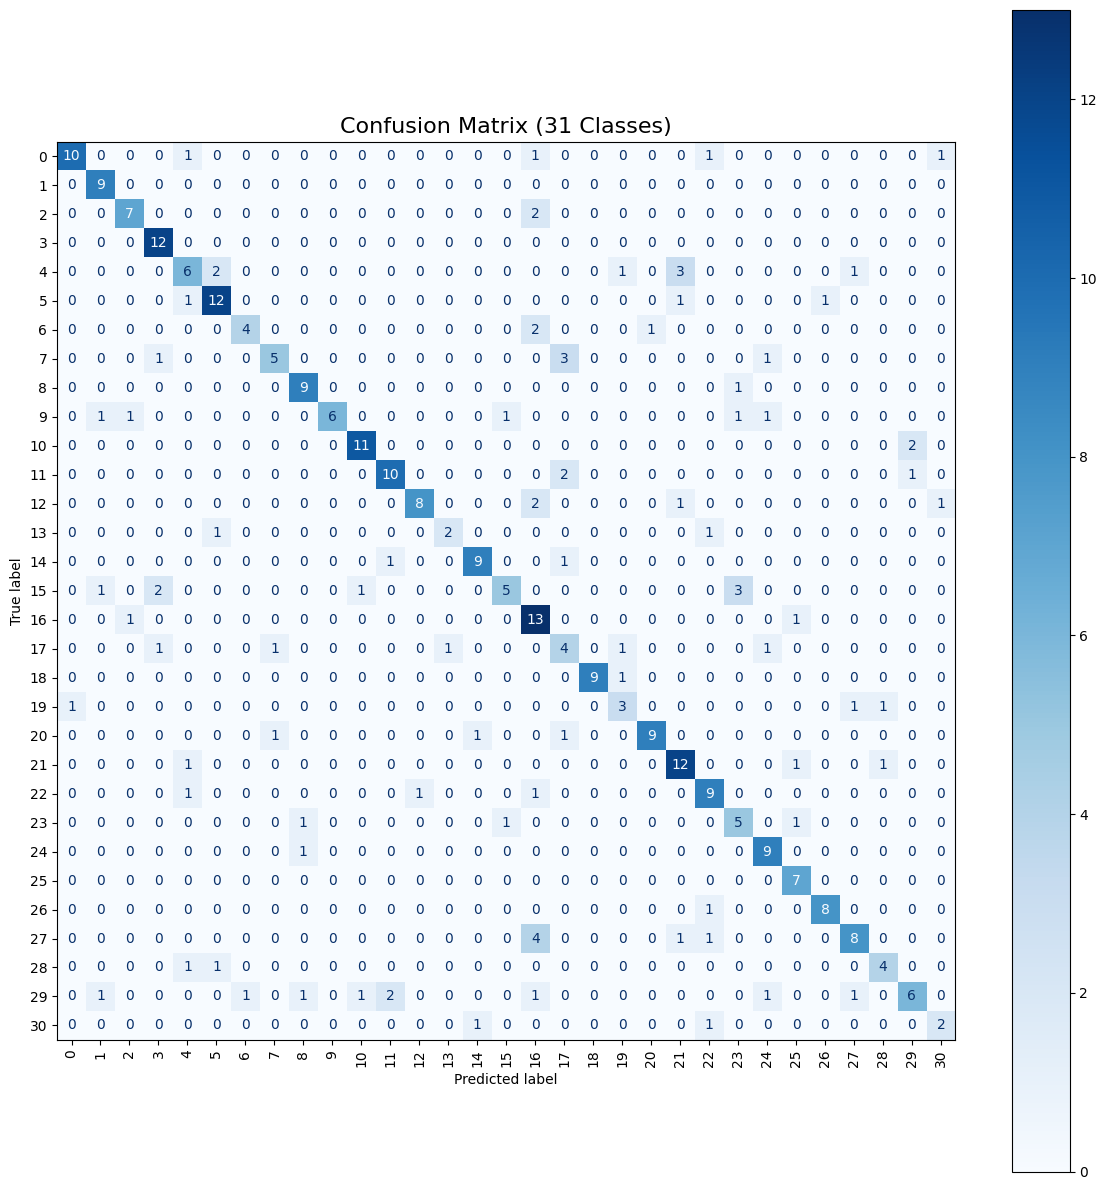

In [66]:
evaluate_model(modelCustom,val_loader)

Accuracy 68.19571865443424


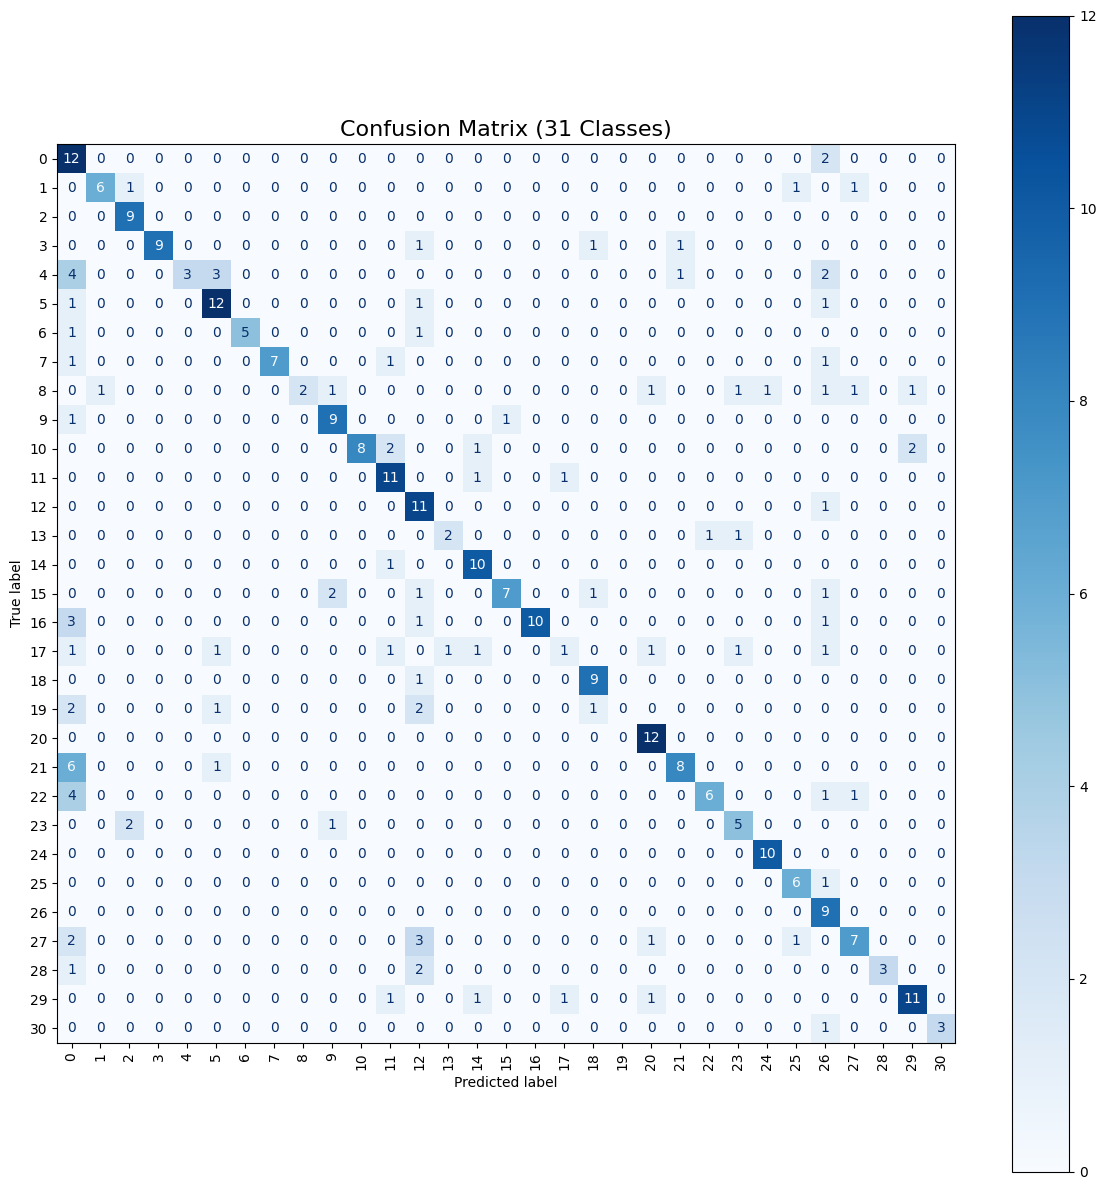

In [67]:
evaluate_model(modelEnanched,val_loader)

Accuracy 86.54434250764525


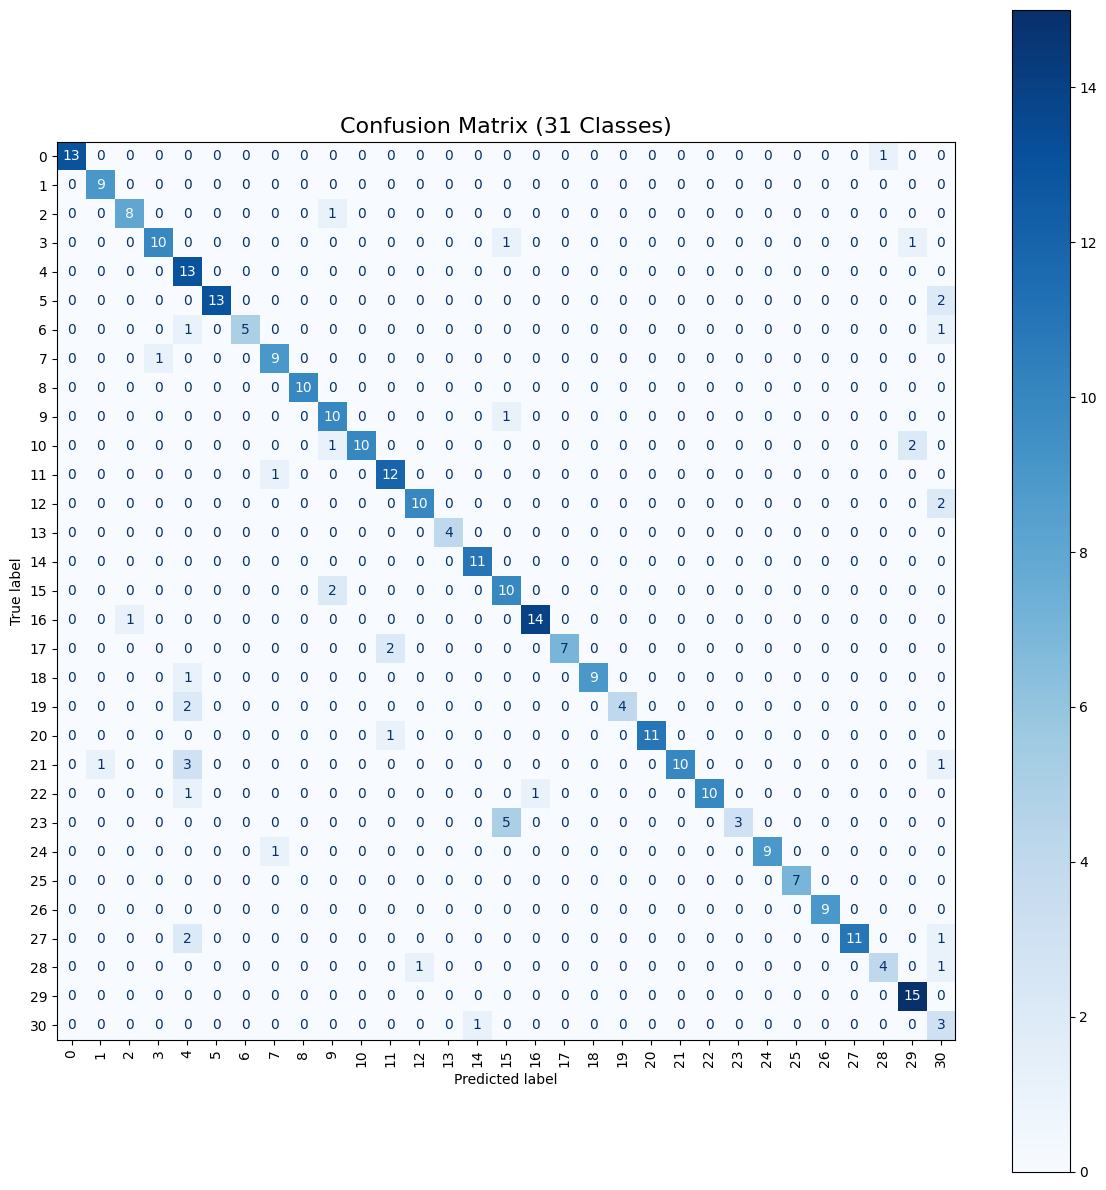

In [65]:
evaluate_model(modelPretrained,val_loader)



*   Custom model 1: 72
*   Attention, residualBlock; 71.55
* Pretrained Resnet 18 86.55
* Pretrained Resnet 18 with freeze and unfreeze: 92.96



# Siamesi Part


In [ ]:
class MetricCNN(nn.Module):
    def __init__(self, embedding_dim=512):
        super(MetricCNN, self).__init__()
        self.conv = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),
            nn.Conv2d(32, 64, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),
            nn.Conv2d(64, 128, 3, padding=1),
            nn.Dropout(0.2),
            nn.ReLU(),
            nn.MaxPool2d(2, 2)
        )
        self.fc = nn.Sequential(
            nn.AdaptiveAvgPool2d(3),
            nn.Flatten(),
            nn.Dropout(0.2),
            nn.Linear(128*3*3, 512),
            nn.Dropout(0.3),
            nn.ReLU(),
            nn.Linear(512, embedding_dim)
        )

    def forward(self, x):
        x = self.conv(x)
        x = self.fc(x)
        return F.normalize(x, p=2, dim=1)  

In [26]:
from torchsummary import summary
device=torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [27]:
model = MetricCNN(embedding_dim=256).to(device)
summary(model, input_size=(3,160,160))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 32, 160, 160]             896
              ReLU-2         [-1, 32, 160, 160]               0
         MaxPool2d-3           [-1, 32, 80, 80]               0
            Conv2d-4           [-1, 64, 80, 80]          18,496
              ReLU-5           [-1, 64, 80, 80]               0
         MaxPool2d-6           [-1, 64, 40, 40]               0
            Conv2d-7          [-1, 128, 40, 40]          73,856
           Dropout-8          [-1, 128, 40, 40]               0
              ReLU-9          [-1, 128, 40, 40]               0
        MaxPool2d-10          [-1, 128, 20, 20]               0
AdaptiveAvgPool2d-11            [-1, 128, 3, 3]               0
          Flatten-12                 [-1, 1152]               0
          Dropout-13                 [-1, 1152]               0
           Linear-14                  [

In [ ]:
import random

class SiameseMNISTDataset(Dataset):
    def __init__(self,images,labels, train=True):
        self.data = images
        self.targets = labels

        self.default_transform = transforms.Compose([
            transforms.ToTensor(),  
        ])

    def __len__(self):
        return len(self.data)

    def __getitem__(self, index):
        img1, label1 = self.data[index], self.targets[index]

        # Decide whether to make a positive or negative pair
        if random.random() < 0.5:
            indices = np.where(self.targets == label1)[0]
        else:
            indices = np.where(self.targets != label1)[0]

        index2 = np.random.choice(indices)
        img2, _ = self.data[index2], self.targets[index2]

 
        img1 = self.default_transform(img1)
        img2 = self.default_transform(img2)


        # Create binary label: 1 for similar, 0 for dissimilar
        sim_label = torch.tensor(int(label1 == self.targets[index2]), dtype=torch.float32)

        return img1, img2, sim_label, int(label1)

In [ ]:
class ContrastiveLoss(nn.Module):
    def __init__(self, margin=1.0):
        super(ContrastiveLoss, self).__init__()
        self.margin = margin

    def forward(self, output1, output2, label):
        euclidean_distance = F.pairwise_distance(output1, output2)
        loss = torch.mean(label * torch.pow(euclidean_distance, 2) 
                          (1 - label) * torch.pow(torch.clamp(self.margin - euclidean_distance, min=0.0), 2))
        return loss

In [ ]:
def train_siamese(model,epochs=5, batch_size=32, learning_rate=0.001):

    print ("Dataset Loading")
    train_dataset = SiameseMNISTDataset(X_train,y_train,train=True)
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

    print ("Model Initialization")
    model = model.to(device)
    criterion = ContrastiveLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

    print ("We now start the training process")
    for epoch in range(epochs):
        epoch_loss = 0
        for img1, img2, label, _ in train_loader:
            img1, img2, label = img1.to(device), img2.to(device), label.to(device)

            output1 = model(img1)
            output2 = model(img2)

            loss = criterion(output1, output2, label)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            epoch_loss += loss.item()

        print(f"Epoch [{epoch+1}/{epochs}], Loss: {epoch_loss/len(train_loader):.4f}")

    torch.save(model.state_dict(), "siamese_mnist.pth")
    print("Model saved as siamese_mnist.pth")
    return model

In [ ]:
model=MetricCNN(embedding_dim=256)
model = train_siamese(model,epochs=150)

In [ ]:
from matplotlib.colors import ListedColormap
def visualize_embeddings(model, n_samples=500):
    test_dataset = SiameseMNISTDataset(X_val,y_val,train=False)
    test_loader = DataLoader(test_dataset, batch_size=1, shuffle=True)

    embeddings, true_labels = [], []
    model.eval()

    with torch.no_grad():
        for img1, _, _, digit_label in test_loader:
            img1 = img1.to(device)
            embedding = model(img1)
            embeddings.append(embedding.cpu().numpy().flatten())
            true_labels.append(digit_label.item())
            if len(embeddings) >= n_samples:
                break


    
    embeddings = np.array(embeddings)
    labels = np.array(true_labels)

    base_colors = plt.cm.tab20.colors  
    extra_colors = plt.cm.hsv(np.linspace(0, 1, 11)) 

    custom_cmap = ListedColormap(base_colors + tuple(extra_colors))

    # Apply t-SNE
    from sklearn.manifold import TSNE
    X_tsne = TSNE(n_components=2, perplexity=30, random_state=42).fit_transform(embeddings)

    # Plot the embeddings
    plt.figure(figsize=(8, 6))
    plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=labels, cmap=custom_cmap, alpha=0.7)
    plt.colorbar(label="Digit Label")
    plt.title("t-SNE Visualization of Learned MNIST Embeddings (Siamese Network)")
    plt.show()

In [ ]:
visualize_embeddings(model)

In [ ]:
class MetricAndClassify(nn.Module):
    def __init__(self, embedding_dim=512):
        super(MetricAndClassify, self).__init__() 

        
        self.pretrained = MetricCNN(embedding_dim=embedding_dim)

       
        self.pretrained.load_state_dict(torch.load("siamese_mnist.pth"))  

        
        self.fc = nn.Sequential(
            nn.Linear(embedding_dim, embedding_dim // 2),  
            nn.Dropout(0.4),  
            nn.ReLU(),
            nn.Linear(embedding_dim // 2, 31)
        )

    def forward(self, x):
        with torch.no_grad():  
            x = self.pretrained(x)
        x = self.fc(x)
        return x

In [ ]:
model=MetricAndClassify(embedding_dim=256)
model = train_network(model,unfrezze=False)


# Triplet

In [ ]:
class MetricCNN(nn.Module):
    def __init__(self, embedding_dim=128, num_classes=31):
        super(MetricCNN, self).__init__()
        self.conv = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=7, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),
            nn.Conv2d(32, 64, 5, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),
            nn.Conv2d(64, 128, 3, padding=1),
            nn.BatchNorm2d(128),
            nn.Dropout(0.2),
            nn.ReLU(),
            nn.MaxPool2d(2, 2)
        )

        self.fc = nn.Sequential(
            nn.AdaptiveAvgPool2d(3),
            nn.Flatten(),
            nn.Dropout(0.2),
            nn.Linear(128*3*3, 512),
            nn.Dropout(0.3),
            nn.ReLU(),
            nn.Linear(512, embedding_dim)
        )


        self.classifier_fc = nn.Sequential(
            nn.Linear(embedding_dim, num_classes)
        )

    def forward(self, x):
        x = self.conv(x)
        embedding = self.fc(x)
        embedding = F.normalize(embedding, p=2, dim=1) 

        class_logits = self.classifier_fc(embedding)  
        return embedding, class_logits

In [37]:
class MetricCNNResnet18(nn.Module):
    def __init__(self, num_classes=31, embedding_dim=256):
        super(MetricCNNResnet18, self).__init__()

        self.pretrained = models.resnet18(pretrained=True)
        in_features = self.pretrained.fc.in_features

        for param in self.pretrained.parameters():
          param.requires_grad = False

        self.pretrained.fc = nn.Linear(in_features, embedding_dim)

        for param in self.pretrained.fc.parameters():
          param.requires_grad = True

        self.classifier_fc = nn.Linear(embedding_dim, num_classes)

    def forward(self, x):
        embedding = self.pretrained(x)
        embedding = F.normalize(embedding, p=2, dim=1)

        class_logits = self.classifier_fc(embedding)

        return embedding, class_logits

    def unfreezeBackbone(self):
      print("UNFREEZE BACK")
      for param in self.pretrained.parameters():
          param.requires_grad = True


In [ ]:
class TripletDataset(Dataset):
    def __init__(self, images,labels):
        self.data = images
        self.targets = labels

        self.default_transform = transforms.Compose([
            transforms.ToTensor(),
        ])

    def __len__(self):
        return len(self.data)

    def __getitem__(self, index):
        anchor, label = self.data[index], self.targets[index]

        # Select a positive sample (same class)
        positive_indices = np.where(self.targets == label)[0]
        positive_index = np.random.choice(positive_indices)
        positive = self.data[positive_index]

        # Select a negative sample (different class)
        negative_indices = np.where(self.targets != label)[0]
        negative_index = np.random.choice(negative_indices)
        negative = self.data[negative_index]

        anchor = self.default_transform(anchor)
        positive = self.default_transform(positive)
        c = self.default_transform(negative)

        return anchor, positive,c, int(label)

In [ ]:
def calculate_class_weights_triplet(train_loader):
    all_labels = []
    for _,_,_, labels in train_loader:
        all_labels.extend(labels.numpy())

    classes = np.unique(all_labels)
    class_weights = compute_class_weight(
        class_weight="balanced",
        classes=classes,
        y=all_labels
    )
    return torch.tensor(class_weights, dtype=torch.float32)

In [ ]:
class TripletLoss(nn.Module):
    def __init__(self, margin=1.0):
        super(TripletLoss, self).__init__()
        self.margin = margin

    def forward(self, anchor, positive, negative):
        pos_dist = F.pairwise_distance(anchor, positive)  # Distance between anchor & positive
        neg_dist = F.pairwise_distance(anchor, negative)  # Distance between anchor & negative
        loss = torch.mean(torch.clamp(pos_dist - neg_dist + self.margin, min=0.0))  
        return loss

In [41]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [ ]:
def train_triplet(model,epochs=5, batch_size=64, learning_rate=0.001,alpha=0.5,patience=7,unfreeze=False):
    print("Dataset Loading")
    train_dataset = TripletDataset(X_train,y_train)
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

    val_dataset = TripletDataset(X_val,y_val)
    val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=True)


    print("Model Initialization")
    model = model.to(device)

    class_weights = calculate_class_weights_triplet(train_loader)
    class_weights=class_weights.to(device)

    criterion_triplet = TripletLoss(margin=1.0)
    criterion_classification = nn.CrossEntropyLoss(weight=class_weights)  
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
    early_stopping = EarlyStopping(patience=patience, verbose=True)

    print("Starting Training Process")
    for epoch in range(epochs):

        if unfreeze and epoch==7:
          model.unfreezeBackbone()


        epoch_loss = 0
        for anchor, positive, negative, labels in train_loader:
            anchor, positive, negative, labels = anchor.to(device), positive.to(device), negative.to(device),labels.to(device)

            anchor_emb,anchor_logits = model(anchor)
            positive_emb,_ = model(positive)
            negative_emb,_ = model(negative)

            anchor_emb,positive_emb,negative_emb,anchor_logits = anchor_emb.to(device),positive_emb.to(device),negative_emb.to(device),anchor_logits.to(device)

            #losses
            loss_triplet = criterion_triplet(anchor_emb, positive_emb, negative_emb)

            loss_classification = criterion_classification(anchor_logits, labels)

            loss = alpha * loss_triplet + (1 - alpha) * loss_classification

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            epoch_loss += loss.item()

        val_loss = 0
        with torch.no_grad():
          for anchor, positive, negative, labels in val_loader:
            anchor, positive, negative, labels = anchor.to(device), positive.to(device), negative.to(device),labels.to(device)
            anchor_emb,anchor_logits = model(anchor)
            positive_emb,_ = model(positive)
            negative_emb,_ = model(negative)

            anchor_emb,positive_emb,negative_emb = anchor_emb.to(device),positive_emb.to(device),negative_emb.to(device)

            loss_triplet = criterion_triplet(anchor_emb, positive_emb, negative_emb)

            loss_classification = criterion_classification(anchor_logits, labels)

            loss = alpha * loss_triplet + (1 - alpha) * loss_classification

            val_loss += loss
        val_loss/=len(val_loader)
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {epoch_loss/len(train_loader):.4f}")
        print(f'| Val Loss: {val_loss}')

        early_stopping(val_loss, model)
        if early_stopping.early_stop:
            print("Early stopping triggered")
            break

    model.load_state_dict(torch.load('checkpoint.pth'))
    return model


In [43]:
model=MetricCNNResnet18(embedding_dim=128)
model = train_triplet(model,epochs=100, unfreeze=True)

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Dataset Loading
Model Initialization
Starting Training Process
Epoch [1/100], Loss: 2.0721
| Val Loss: 1.9456229209899902
Val loss decreased (inf → 1.945623). Saving model...
Epoch [2/100], Loss: 1.8892
| Val Loss: 1.8587067127227783
Val loss decreased (1.945623 → 1.858707). Saving model...
Epoch [3/100], Loss: 1.7711
| Val Loss: 1.7587008476257324
Val loss decreased (1.858707 → 1.758701). Saving model...
Epoch [4/100], Loss: 1.6873
| Val Loss: 1.675195574760437
Val loss decreased (1.758701 → 1.675196). Saving model...
Epoch [5/100], Loss: 1.6301
| Val Loss: 1.6588304042816162
Val loss decreased (1.675196 → 1.658830). Saving model...
Epoch [6/100], Loss: 1.5697
| Val Loss: 1.614904761314392
Val loss decreased (1.658830 → 1.614905). Saving model...
Epoch [7/100], Loss: 1.5070
| Val Loss: 1.5648746490478516
Val loss decreased (1.614905 → 1.564875). Saving model...
UNFREEZE BACK
Epoch [8/100], Loss: 1.5027
| Val Loss: 1.3859782218933105
Val loss decreased (1.564875 → 1.385978). Saving mod

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

def evaluate_model_triplet(model,validation_loader):

  total=0
  correct=0
  all_preds = []
  all_labels = []
  device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
  model.to(device) 

  with torch.no_grad():
    for images,labels in validation_loader:
      images, labels = images.to(device), labels.to(device) 
      _,outputs=model(images)
      _,predicted=torch.max(outputs.data,1)
      total+=labels.size(0)
      correct+=(predicted==labels).sum().item()
      all_preds.extend(predicted.cpu().numpy())
      all_labels.extend(labels.cpu().numpy())

  accuracy=100*correct/total
  print(f"Accuracy {accuracy}")

  #show confusion matrix
  cm = confusion_matrix(all_labels, all_preds)

  fig, ax = plt.subplots(figsize=(12, 12))
  disp = ConfusionMatrixDisplay(confusion_matrix=cm)
  disp.plot(cmap='Blues', ax=ax, xticks_rotation=90, colorbar=True)

  plt.title("Confusion Matrix (31 Classes)", fontsize=16)
  plt.tight_layout()
  plt.show()

Accuracy 93.88379204892966


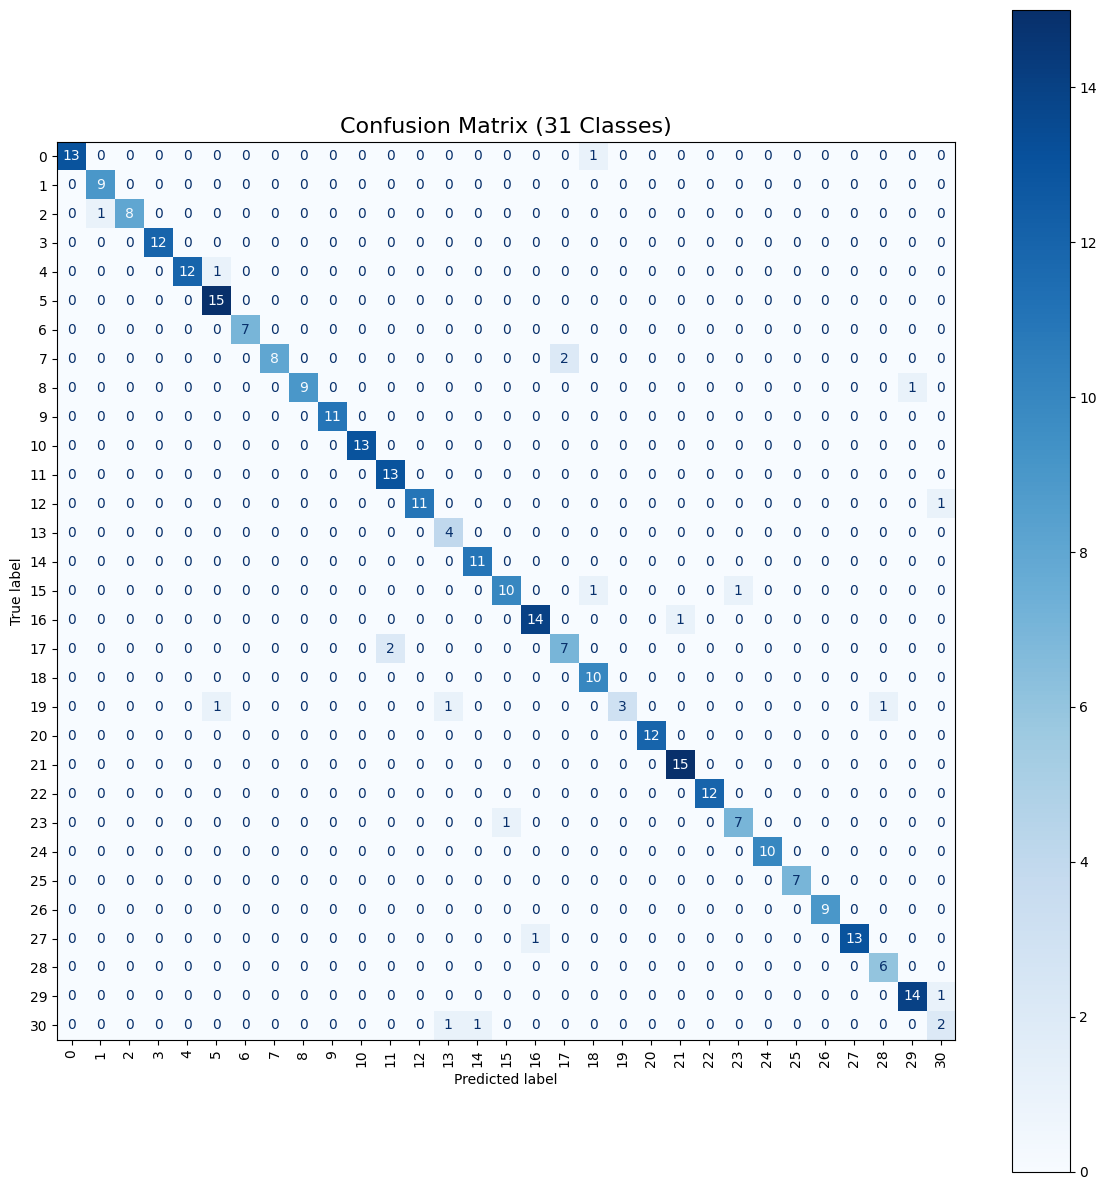

In [59]:
evaluate_model_triplet(model,val_loader)

In [ ]:
def visualize_triplet_embeddings(model, n_samples=500):
    test_dataset = TripletDataset(X_val,y_val)
    test_loader = DataLoader(test_dataset, batch_size=1, shuffle=True)

    embeddings, true_labels = [], []
    model.eval()

    with torch.no_grad():
        for anchor, _, _, digit_label in test_loader:
            anchor = anchor.to(device)
            embedding,_ = model(anchor)
            embeddings.append(embedding.cpu().numpy().flatten())
            true_labels.append(digit_label.item())
            if len(embeddings) >= n_samples:
                break

    embeddings = np.array(embeddings)
    labels = np.array(true_labels)


    base_colors = plt.cm.tab20.colors  
    extra_colors = plt.cm.hsv(np.linspace(0, 1, 11))  

    custom_cmap = ListedColormap(base_colors + tuple(extra_colors))

    from sklearn.manifold import TSNE
    X_tsne = TSNE(n_components=2, perplexity=30, random_state=42).fit_transform(embeddings)

    plt.figure(figsize=(8, 6))
    plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=labels, cmap=custom_cmap, alpha=0.7)
    plt.colorbar(label="Digit Label")
    plt.title("t-SNE Visualization of Triplet Loss Embeddings")
    plt.show()

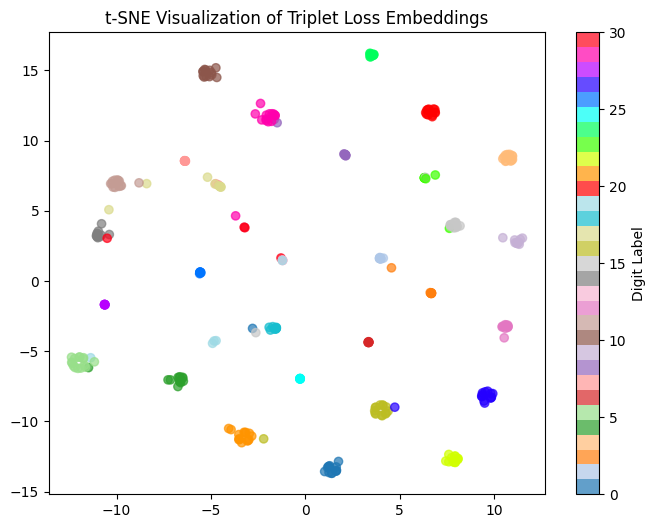

In [47]:
visualize_triplet_embeddings(model)